In [1]:
import control
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

import sys
sys.path.append('../')
from control_utils import *

In [2]:
NT = len('Leonardo Santiago Benitez Pereira')
NT

33

# Tabelado - Exponential
$$
f[n] = a^n,\\
com\ a=33/50
$$


   z
--------
z - 0.66

dt = 1



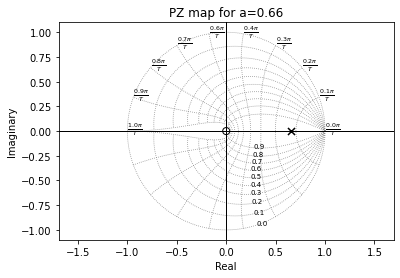

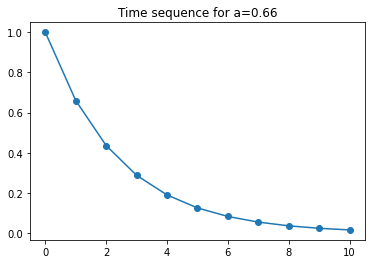

In [3]:
a = NT/50
Gz = control.tf([1, 0], [1, -a], 1)
print(Gz)
control.pzmap(Gz, title=f"PZ map for a={a}", grid=True)

plt.figure()
x = np.linspace(0, 10, 11)
y = a**x
plt.plot(x, y) #resposta real
plt.title(f"Time sequence for a={a}")


x, y = control.impulse_response(Gz, 10) 
plt.scatter(x, y) #resosta pelo domínio z

# Tabelado - Sine
$$
f[n] = sin(W_0T*n),\\
com\ W_0T=33/50
$$


   -0.6131 z
----------------
z^2 - 1.58 z + 1

dt = 1



(array([0.78999223+0.61311685j, 0.78999223-0.61311685j]), array([0.]))

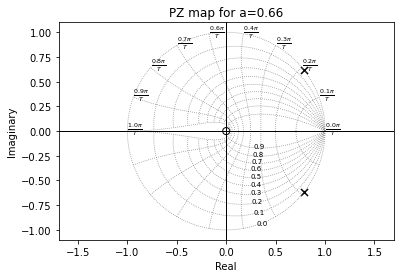

In [4]:
WoT = -NT/50
Gz = control.tf([np.sin(WoT), 0], [1, -2*np.cos(WoT), 1], 1)
print(Gz)
control.pzmap(Gz, title=f"PZ map for a={a}", grid=True)

# Arbitrary function (exercise 7)

<img src="ex_7.jpeg"/>

<img src="ex_7_resolvido.jpeg"/>


In [5]:
Gz = control.tf([10, 5], [1, -1.2, 0.2], 1)

print("Given the function:")
display(Markdown(Gz._repr_latex_()))

print("Expanding by partial fractions, we'll have:")
display(Markdown('$$' + tf_expand_partial_format(Gz) + '$$'))

print('To which the exact inverse transform is:')
display(Markdown('$$' + tf_inverse_transform_format(Gz) + '$$'))

Given the function:


$$\frac{10 z + 5}{z^2 - 1.2 z + 0.2}\quad dt = 1$$

Expanding by partial fractions, we'll have:


$$Y(Z)/Z = \frac{25*Z}{Z - 0} + \frac{-43.75*Z}{Z - 0.2} + \frac{18.75*Z}{Z - 1}$$

To which the exact inverse transform is:


$$y(n) = +25.0000*\delta[n] -43.7500*0.2000^n +18.7500*1.0000^n$$

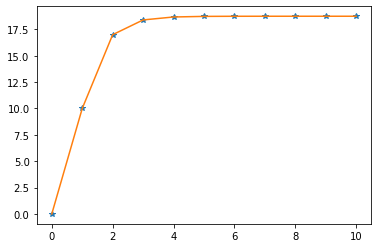

In [6]:
t_final = 10
k_vec = np.linspace(0, t_final, t_final+1, dtype=int)
y1 = np.empty(t_final+1)
y2 = np.empty(t_final+1)

e = 15*np.ones(t_final+1)
e[0] = 10


assert len(y1) == len(k_vec)
assert len(y2) == len(k_vec)
assert len(e) == len(k_vec)

#############
# Eq recursiva

# Condições iniciais
y1[0] = 0

# Recursão
for k in k_vec[1:]:
    y1[k] = 0.2*y1[k-1] + e[k-1]
    
##################
# Eq exata
y2 = -43.75*0.2**k_vec + 18.75*1**k_vec
y2[0] += 25


plt.plot(k_vec, y1, '*')
plt.plot(k_vec, y2)